In [ ]:
!pip install --upgrade google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from IPython.display import YouTubeVideo

In [ ]:
youTubeApiKey=""
channel_id = "UC4aiJNDUviw_vMhdCq5Kq1Q" ### Casemiro Browse_id só procurar no código fonte do canal
youtube = build('youtube','v3', developerKey=youTubeApiKey)

In [ ]:
def get_channel_stats (youtube, channel_id):
    request = youtube.channels().list(
        part = "snippet, contentDetails, statistics",
        id = channel_id
    )
    response = request.execute()
    ###print(response)
    ###print(response['items'])
    return response['items']

In [ ]:
def get_video_list(youtube, upload_id):
      video_list = []
      request = youtube.playlistItems().list(
          part = "snippet, contentDetails",
          playlistId = upload_id,
          maxResults = 50
      )
      next_page = True

      while next_page:
        response = request.execute()
        data = response ['items']

        for video in data:
          video_id = video['contentDetails']['videoId']
          if video_id not in video_list:
            video_list.append(video_id)

        if 'nextPageToken' in response.keys():
            next_page = True
            request = youtube.playlistItems().list(
                part = "snippet, contentDetails",
                playlistId = upload_id,
                maxResults = 50,
                pageToken = response['nextPageToken']
            )
        else:
            next_page = False

      return video_list



In [ ]:
def get_video_details(youtube, video_list):
  stats_list=[]

  for i in range(0, len(video_list), 50): ###Pega do primeiro ao ultimo video do canal pulando de 50 em 50, já que o máximo que a API do Youtube tem limite de 50 por request
    request=youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=video_list[i:i+50] ###Slice me dando 50 videos de cada vez
    )

    data = request.execute()

    for video in data ['items']:
      title = video['snippet']['title']
      published = video['snippet']['publishedAt']
      description = video['snippet']['description']
      tag_count = len(video['snippet'].get('tags', []))
      view_count = video['statistics'].get('viewCount',0)
      like_count = video['statistics'].get('likeCount',0)
      favorite_count = video['statistics'].get('favoriteCount',0)
      comment_count = video['statistics'].get('commentCount',0)

      stats_dictionary = dict(
          title=title,
          published=published,
          description=description,
          tag_count=tag_count,
          view_count=view_count,
          like_count=like_count,
          favorite_count=favorite_count,
          comment_count=comment_count
          )
      
      stats_list.append(stats_dictionary)

  return stats_list

In [ ]:
###get_channel_stats(youtube, channel_id) ### Use o JSON formatter para entender o resultado

In [ ]:
channel_stats = get_channel_stats(youtube, channel_id) 

In [ ]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UU4aiJNDUviw_vMhdCq5Kq1Q'

In [ ]:
###channel_stats[0]['statistics'] ###Estatistica do Canal

In [ ]:
video_list = get_video_list(youtube, playlist_id)

In [ ]:
video_list[0] ### Indice 0 da lista de videos do canal.

'hbg1Em4COh4'

In [ ]:
len(video_list) ### Quantidade de Videos do Canal Armazenados na Lista

3094

In [ ]:
video_data = get_video_details(youtube, video_list)

In [ ]:
video_data[0] ###Conferindo o que selecionamos para a API buscar

{'comment_count': '153',
 'description': 'Soon Films:\nhttps://www.youtube.com/c/SoonFilms\n\nVÍDEO ORIGINAL:\nhttps://www.youtube.com/watch?v=pOWC-mDUfEo\n\nDeixe o like! 👍\nSe inscreva! 📩\nAtive o sino! 🔔\n\nCanal Principal ➤  https://www.youtube.com/c/Casimiromiguel\nAssista às lives ➤ Procure /Casimito na roxinha! \nCanal de Gols da Rodada ➤ https://www.youtube.com/channel/UCAXqS7hFm3vSWs6YpxsvC4g\n\nLive todos os dias!\n\n📱 Redes sociais: \n📸 Instagram: /CASIMIRO\n🐦Twitter: /CASIMIRO\n-\nTwitter/Instagram do Editor: @RanieGallardo\n-\n\nContato comercial: casimiro@livemode.net',
 'favorite_count': '0',
 'like_count': '10705',
 'published': '2022-07-03T15:00:20Z',
 'tag_count': 6,
 'title': 'CASIMIRO REAGE: SANDUÍCHE DE CARNE BEM BOLADO (SE É QUE VOCÊ ME ENTENDE) | Cortes do Casimito',
 'view_count': '83830'}

In [ ]:
len(video_data) ###Conferindo se todos os Videos foram armazenados

3094

In [ ]:
df = pd.DataFrame(video_data)

In [ ]:
df['title_length'] = df['title'].str.len()
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["favorite_count"] = pd.to_numeric(df["favorite_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
### reação usada depois adicionando mais likes + favoritos + comentários
df["reactions"] = df["like_count"] + df["favorite_count"] + df ["comment_count"]
df.to_csv("Youtube-CanalCasemiro.csv")
df.head()

,title,published,description,tag_count,view_count,like_count,favorite_count,comment_count,title_length,reactions
0,CASIMIRO REAGE: SANDUÍCHE DE CARNE BEM BOLADO ...,2022-07-03T15:00:20Z,Soon Films:\nhttps://www.youtube.com/c/SoonFil...,6,83830,10705,0,153,93,10858
1,CASIMIRO DE RESENHA NO FIFA COM OS AMIGOS - OS...,2022-07-03T13:00:07Z,DEKIN: https://twitter.com/dekin021\nBELTRÃO: ...,6,44244,5368,0,66,99,5434
2,CASIMIRO JOGANDO FALL GUYS COM OS AMIGOS: A BU...,2022-07-02T23:00:30Z,Dekin: https://twitter.com/dekin021\nMaciel c*...,6,150711,14092,0,168,93,14260
3,CASIMIRO REAGE A SUPERNANNY (O MOLEQUE BOTOU E...,2022-07-02T21:30:02Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,6,183998,14816,0,549,80,15365
4,CASIMIRO REAGE: MUQUIRANAS! CHARLES HENRIQUEPÉ...,2022-07-02T18:00:16Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,6,233686,20109,0,609,82,20718


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Ocorrências'), Text(0.5, 0, 'Número de Tags Usadas')]

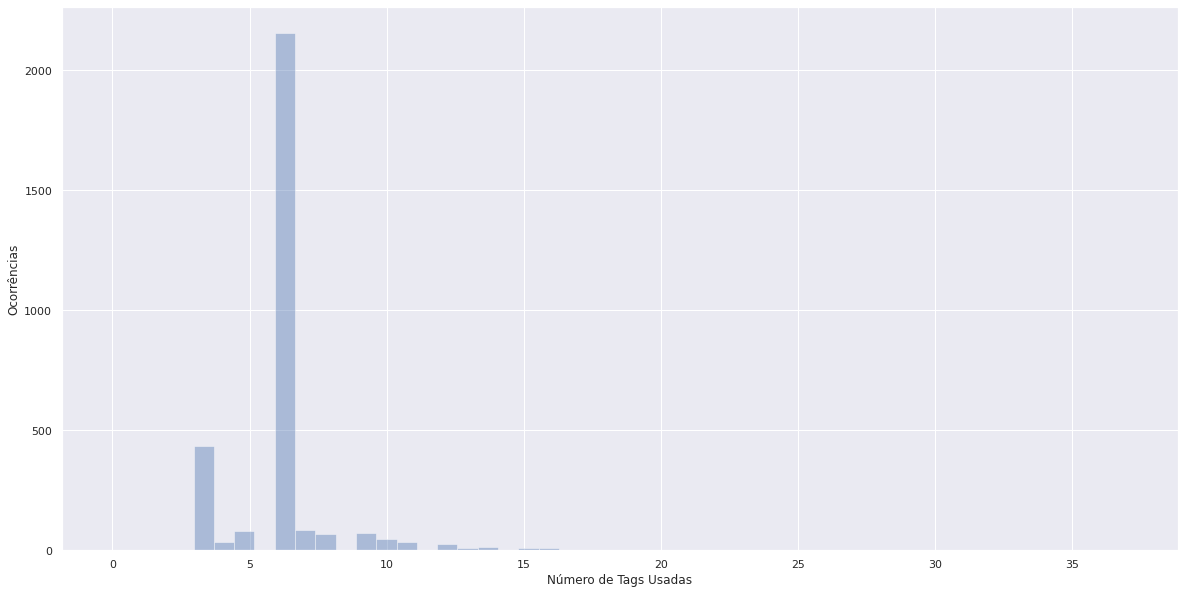

In [ ]:
###Tags
chart = sns.distplot( a=df["tag_count"], hist=True, kde=False, rug=False )
chart.set(xlabel='Número de Tags Usadas', ylabel='Ocorrências')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Ocorrências'), Text(0.5, 0, 'Tamanho do Titulo')]

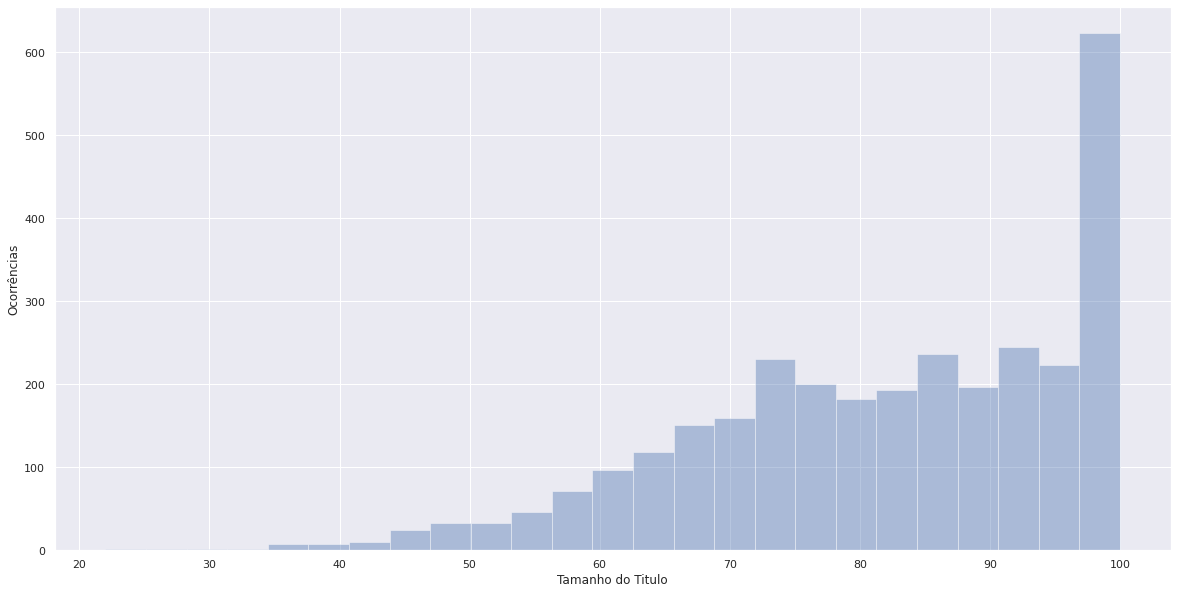

In [ ]:
###Tamanho do titulo
chart = sns.distplot( a=df["title_length"], hist=True, kde=False, rug=False )
chart.set(xlabel='Tamanho do Titulo', ylabel='Ocorrências')

In [ ]:
### 10 Maiores videos por visualizção
df_highest_views = df.nlargest(10, 'view_count')
df_highest_views['title'] = df_highest_views['title'].str[:44]
df_highest_views['view_count_millions'] = df_highest_views['view_count'] / 1000000 ###Milhões de visualizações
df_highest_views

,title,published,description,tag_count,view_count,like_count,favorite_count,comment_count,title_length,reactions,view_count_millions
3054,CASIMIRO REAGE A PESADELO NA COZINHA: MAMMA,2021-04-02T11:42:29Z,SÓ OS CACHORRÃO ONLINE\n\nDeixe o like! 👍\nSe ...,6,7854820,224877,0,6552,70,231429,7.854820
2976,CASIMIRO REAGE A PESADELO NA COZINHA: KITAND,2021-04-22T00:00:03Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,7,4802452,136404,0,3266,77,139670,4.802452
2151,CASIMIRO REAGE AO HAMBÚRGUER 3X CAMPEÃO DO B,2021-08-23T15:57:48Z,FoodieBoy 푸디보이:\nhttps://www.youtube.com/chann...,6,4457026,232557,0,1850,82,234407,4.457026
1424,CASIMIRO REAGE: REPÓRTER DOIDÃO O RETORNO |,2021-11-29T18:00:32Z,DIOGO DEFANTE:\nhttps://www.youtube.com/channe...,6,4339516,442887,0,4645,99,447532,4.339516
2126,CASIMIRO REAGE AO VERDADEIRO HAMBURGUER DE S,2021-08-26T15:30:14Z,VÍDEO ORIGINAL:\nhttps://www.youtube.com/watch...,6,4137003,218430,0,3277,68,221707,4.137003
1379,O DIA QUE CASIMIRO TENTOU COMPRAR UM NOVO IP,2021-12-05T23:30:02Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,6,4063726,333728,0,5959,87,339687,4.063726
2072,CASIMIRO REAGE AO BIFE FERVIDO NA PURA MANTE,2021-09-02T15:38:05Z,Canal do criador:\nhttps://www.youtube.com/cha...,6,3664639,198009,0,2477,100,200486,3.664639
2122,CASIMIRO REAGE A COMIDAS DE RUA INDIANA - O,2021-08-26T23:30:01Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,6,3072888,144395,0,3916,82,148311,3.072888
2051,CASIMIRO REAGE AO VÍDEO DE LIMPEZA E ORGANIZ,2021-09-04T15:30:02Z,Vídeo original:\nhttps://www.youtube.com/watch...,6,2550802,128969,0,2511,97,131480,2.550802
579,CASIMIRO REAGE: ENTREVISTA COM O MORADOR DE,2022-03-24T18:05:00Z,VÍDEO ORIGINAL:\nhttps://www.youtube.com/watch...,6,2420269,180502,0,10519,98,191021,2.420269


(0.0, 8.0)

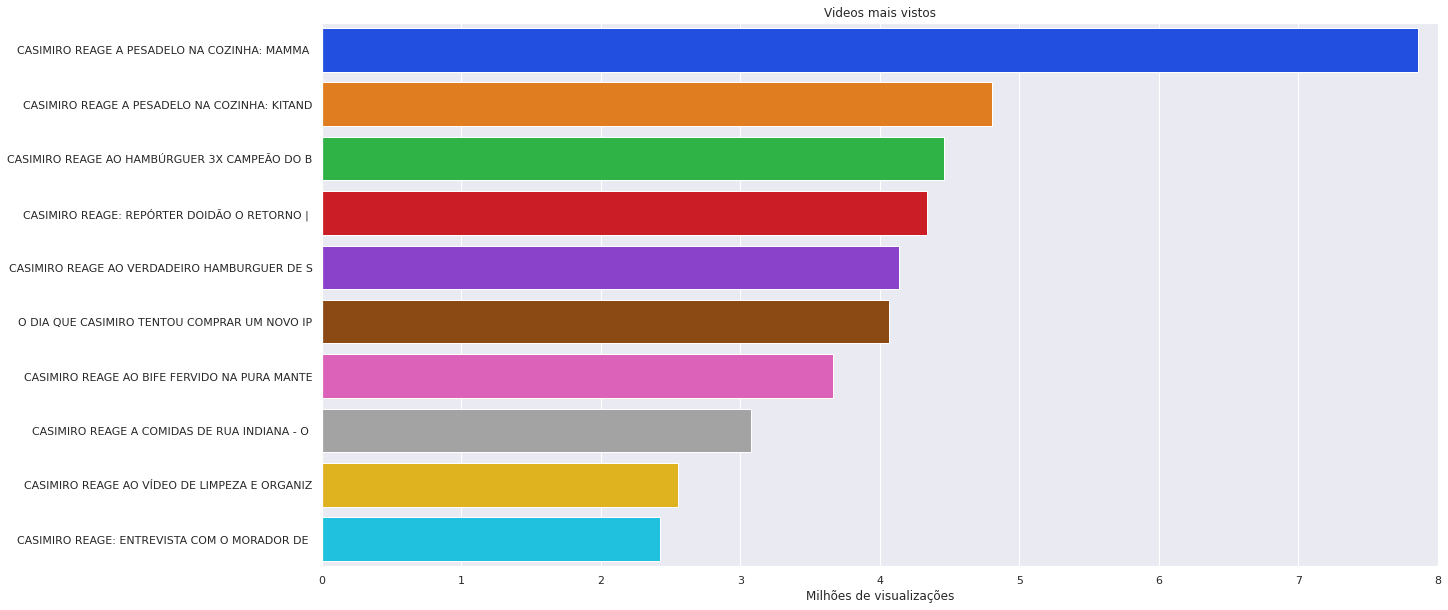

In [ ]:
###Gráfico de barras com titulo dos 10 videos mais visualizados na casa dos milhões
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.barplot(x="view_count_millions", y="title", data=df_highest_views, palette="bright")
plot.set(xlabel= 'Milhões de visualizações', ylabel='')
plot.set_title('Videos mais vistos')
plt.xlim(0, 8)

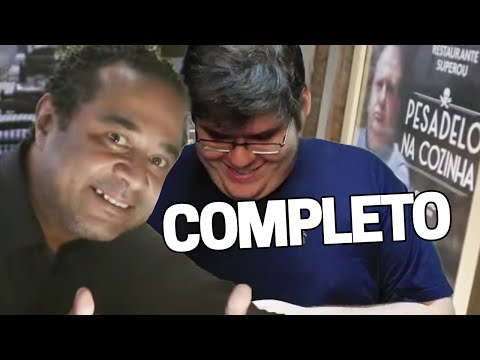

In [ ]:
### O Primeiro colocado dos videos mais vistos caso queira assistir.
YouTubeVideo('HFAWH_PzjR0')

In [ ]:
### 10 videos mais curtidos
df_highest_like = df.nlargest(10, 'like_count')
df_highest_like['title'] = df_highest_like['title'].str[:44]
df_highest_like['like_count'] = df_highest_like['like_count'] / 1000 
df_highest_like

,title,published,description,tag_count,view_count,like_count,favorite_count,comment_count,title_length,reactions
1424,CASIMIRO REAGE: REPÓRTER DOIDÃO O RETORNO |,2021-11-29T18:00:32Z,DIOGO DEFANTE:\nhttps://www.youtube.com/channe...,6,4339516,442.887,0,4645,99,447532
1379,O DIA QUE CASIMIRO TENTOU COMPRAR UM NOVO IP,2021-12-05T23:30:02Z,Deixe o like! 👍\nSe inscreva! 📩\nAtive o sino!...,6,4063726,333.728,0,5959,87,339687
2151,CASIMIRO REAGE AO HAMBÚRGUER 3X CAMPEÃO DO B,2021-08-23T15:57:48Z,FoodieBoy 푸디보이:\nhttps://www.youtube.com/chann...,6,4457026,232.557,0,1850,82,234407
3054,CASIMIRO REAGE A PESADELO NA COZINHA: MAMMA,2021-04-02T11:42:29Z,SÓ OS CACHORRÃO ONLINE\n\nDeixe o like! 👍\nSe ...,6,7854820,224.877,0,6552,70,231429
2126,CASIMIRO REAGE AO VERDADEIRO HAMBURGUER DE S,2021-08-26T15:30:14Z,VÍDEO ORIGINAL:\nhttps://www.youtube.com/watch...,6,4137003,218.430,0,3277,68,221707
1445,CASIMIRO REAGE: ROUND 6 NA VIDA REAL! PRÊMIO,2021-11-25T15:30:00Z,MrBeast Channel:\nhttps://www.youtube.com/user...,6,1934279,204.869,0,2821,97,207690
2072,CASIMIRO REAGE AO BIFE FERVIDO NA PURA MANTE,2021-09-02T15:38:05Z,Canal do criador:\nhttps://www.youtube.com/cha...,6,3664639,198.009,0,2477,100,200486
722,CASIMIRO REAGE AO DIOGO DEFANTE: REPÓRTER DO,2022-03-03T18:00:11Z,Defante: https://www.youtube.com/c/diogodefant...,6,1876733,193.395,0,1720,86,195115
770,CASIMIRO REAGINDO AO EI NERD REAGINDO AO CAS,2022-02-24T18:00:18Z,Ei Nerd:\nhttps://www.youtube.com/c/einerdtv\n...,6,2061136,187.371,0,2830,100,190201
579,CASIMIRO REAGE: ENTREVISTA COM O MORADOR DE,2022-03-24T18:05:00Z,VÍDEO ORIGINAL:\nhttps://www.youtube.com/watch...,6,2420269,180.502,0,10519,98,191021


(0.0, 450.0)

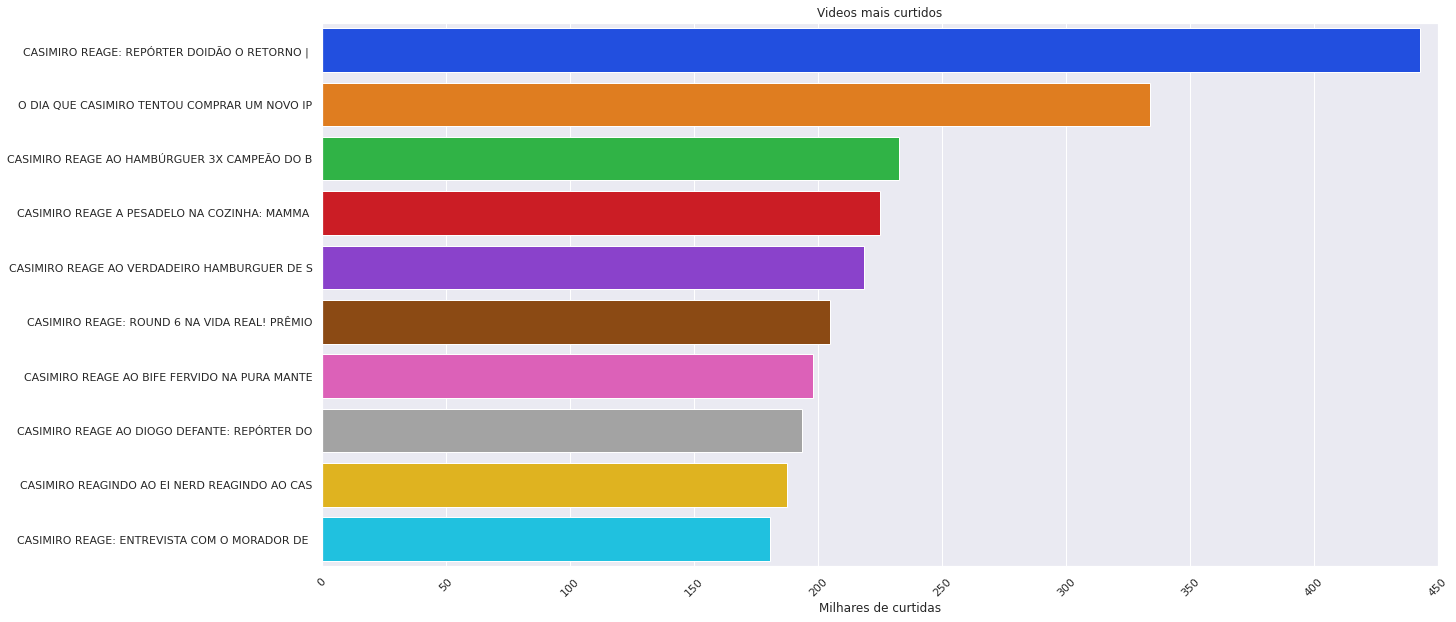

In [ ]:
###Gráfico de barras com titulo dos 10 videos mais curtidos
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.barplot(x="like_count", y="title", data=df_highest_like, palette="bright")
plot.set(xlabel= 'Milhares de curtidas', ylabel='')
plt.xticks(rotation=45)
plot.set_title('Videos mais curtidos')
plt.xlim(0, 450)

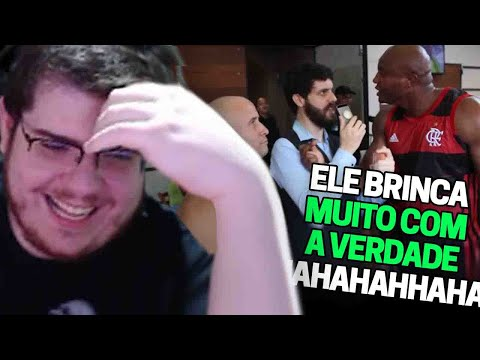

In [ ]:
### O Primeiro colocado dos mais curtidos caso queira assistir.
YouTubeVideo('vo5AAsncj_E')